<a href="https://colab.research.google.com/github/yadavrahyl2k15/logisitic_regression/blob/main/logistic_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score,recall_score,precision_score,accuracy_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
data=pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

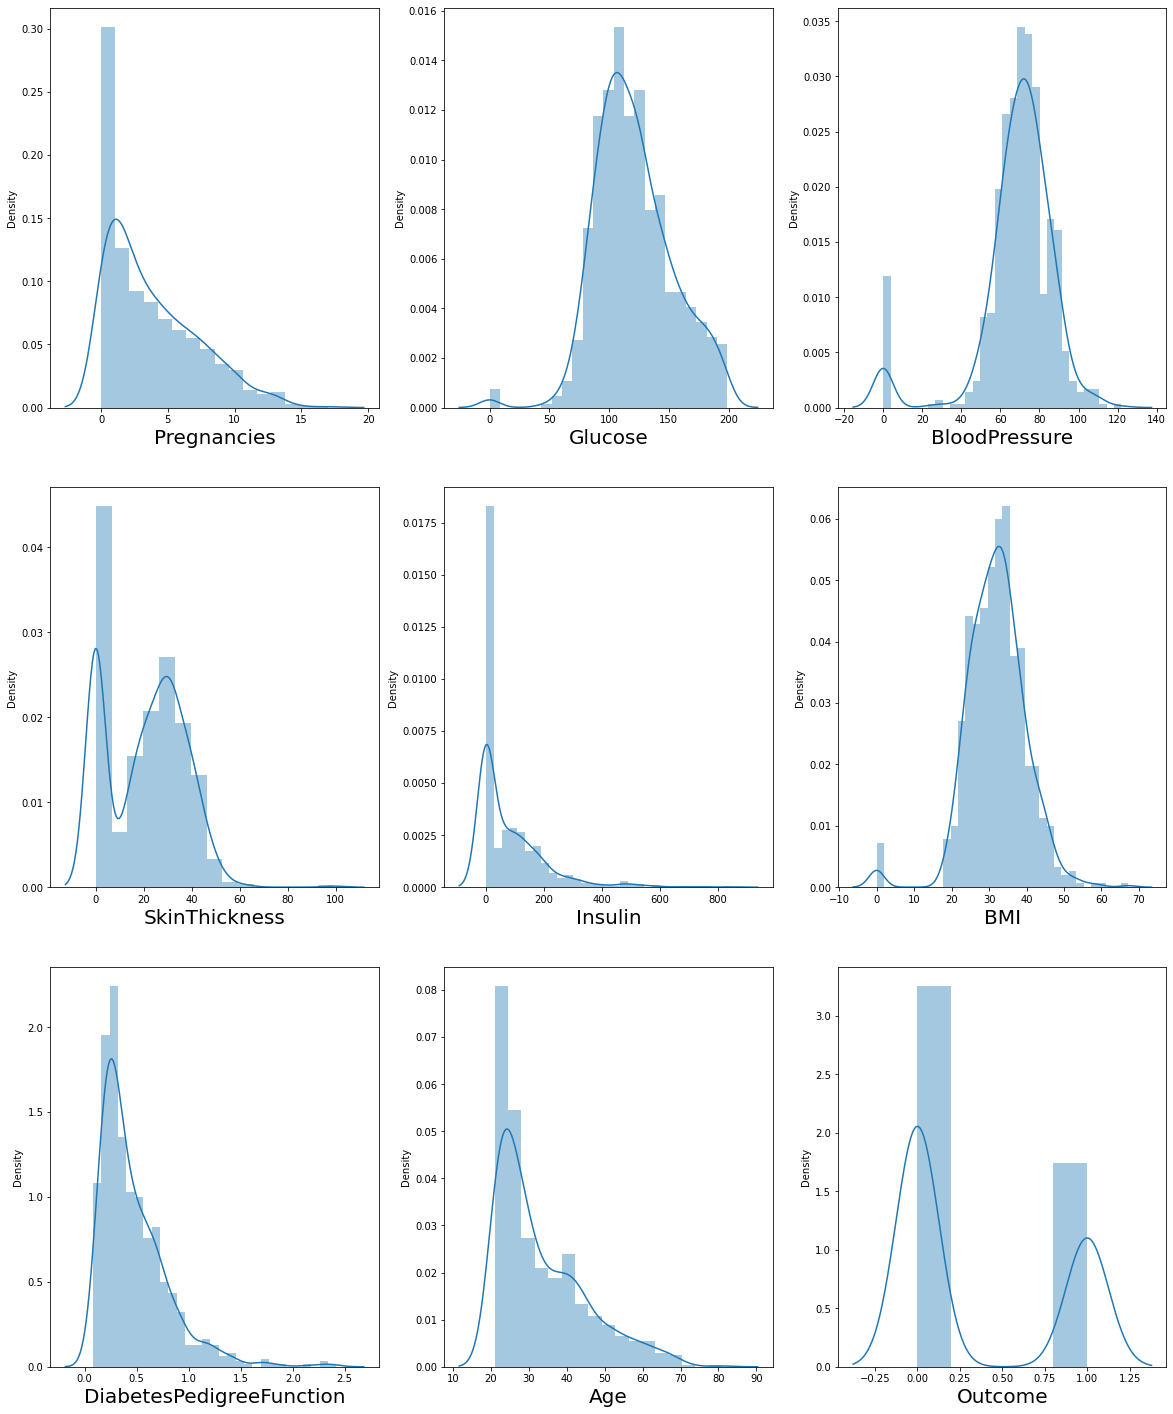

In [4]:
#data visualization
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()


we can see that some of them are skewed i.e. rightskewed/positiveskewed

we have some value of 0 in data which is not possible for data so fill data with mean


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["Pregnancies"]=data["Pregnancies"].replace(0,data["Pregnancies"].mean())
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["DiabetesPedigreeFunction"]=data["DiabetesPedigreeFunction"].replace(0,data["DiabetesPedigreeFunction"].mean())
data["Age"]=data["Age"].replace(0,data["Age"].mean())


In [7]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

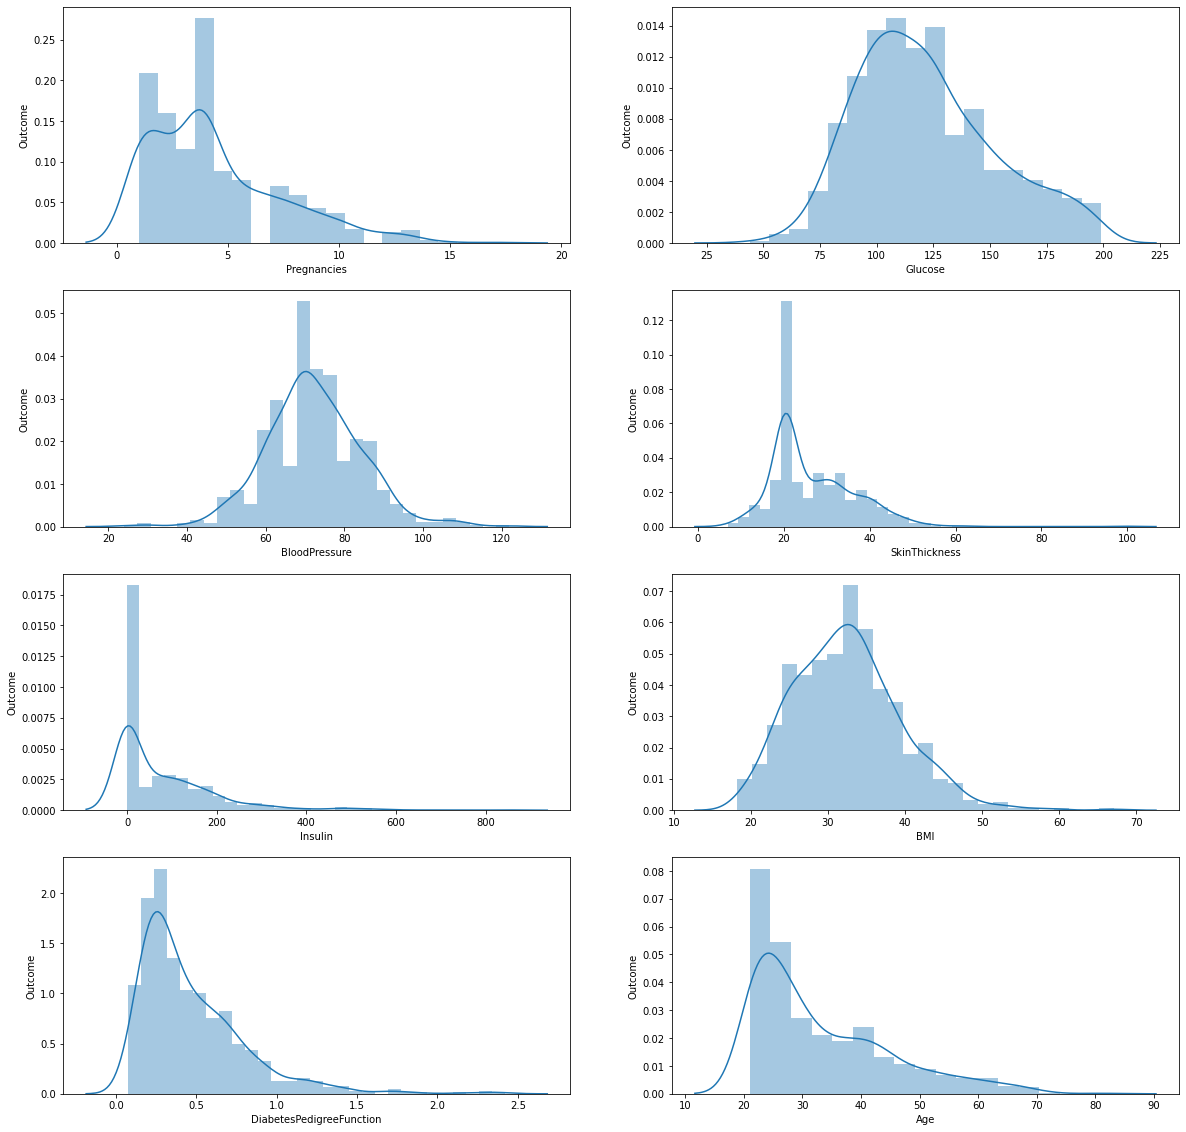

In [8]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for i in x:
  if plotnumber<=8:
    ax=plt.subplot(4,2,plotnumber)
    sns.distplot(x[i])
    plt.xlabel(i,fontsize=10)
    plt.ylabel("Outcome",fontsize=10)
  plotnumber+=1
plt.show()

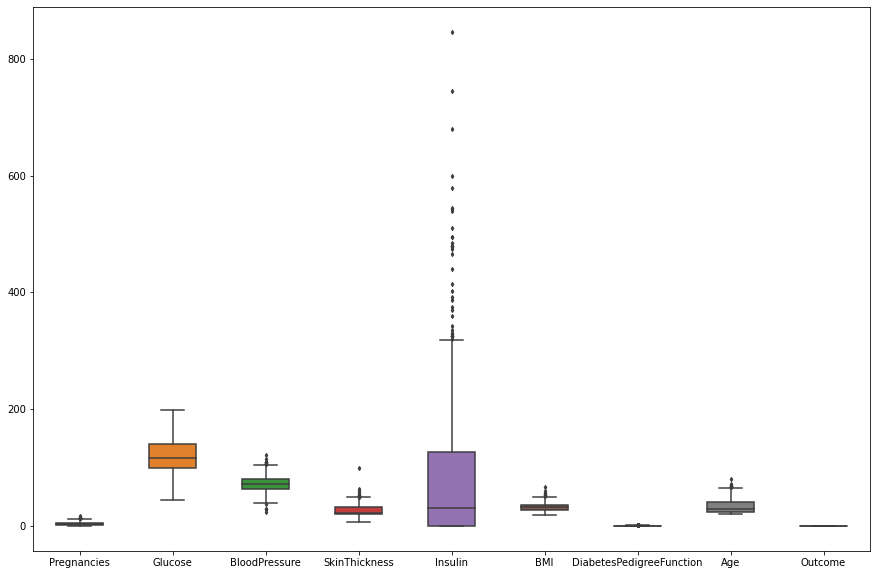

In [9]:
#outliers
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [10]:
q=data["Pregnancies"].quantile(0.98)
data=data[data["Pregnancies"]<q]
q=data["Glucose"].quantile(0.99)
data=data[data["Glucose"]<q]
q=data["BloodPressure"].quantile(0.99)
data=data[data["BloodPressure"]<q]
q=data["SkinThickness"].quantile(0.99)
data=data[data["SkinThickness"]<q]
q=data["Insulin"].quantile(0.95)
data=data[data["Insulin"]<q]
q=data["BMI"].quantile(0.99)
data=data[data["BMI"]<q]
q=data["DiabetesPedigreeFunction"].quantile(0.99)
data=data[data["DiabetesPedigreeFunction"]<q]
q=data["Age"].quantile(0.99)
data=data[data["Age"]<q]

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [12]:
x_scaled.shape

(768, 8)

In [13]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [14]:
vif

,VIF,Features
0,1.414343,Pregnancies
1,1.298936,Glucose
2,1.256555,BloodPressure
3,1.484777,SkinThickness
4,1.265065,Insulin
5,1.558031,BMI
6,1.062907,DiabetesPedigreeFunction
7,1.551129,Age


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [16]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred=log_reg.predict(x_test)

In [20]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7598425196850394

In [21]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[141,  27],
       [ 34,  52]])

In [24]:
tp=matrix[0][0]
fp=matrix[0][1]
fn=matrix[1][0]
tn=matrix[1][1]

In [25]:
precission=tp/(tp+fp)
precission

0.8392857142857143

In [27]:
recall=tp/(tp+fn)
recall

0.8057142857142857

In [28]:
f1_score=2*(precission*recall)/(precission+recall)
f1_score

0.8221574344023325

In [29]:
#Area Under Curve
auc=roc_auc_score(y_test,y_pred)
auc

0.7219684385382059

In [32]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

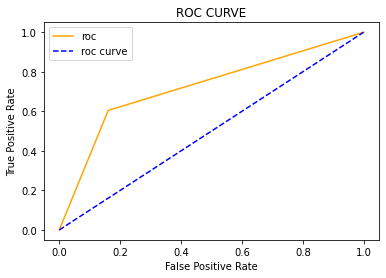

In [36]:
plt.plot(fpr,tpr,color="orange",label="roc")
plt.plot([0,1],[0,1],color="blue",linestyle="--",label="roc curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()